In [1]:
import pandas as pd
import glob
import os
import numpy as np

# Define the directory where the CSV files are located
path = 'usa'  # Use your path

# Find all CSV files in the directory
all_files = glob.glob(os.path.join(path, '*', 'listings_detailed.csv'))

# Create a list to hold the dataframes
dfs = []

# Read each CSV file, add a 'city' column, and append it to the list of dataframes
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    
    # Extract city name from the folder name
    city_name = os.path.basename(os.path.dirname(filename))
    
    # Add a new column 'city' with the city name
    df['city'] = city_name
    
    dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, axis=0, ignore_index=True)


In [18]:
combined_df.to_csv('listings_raw.csv', index=False)

In [2]:
# Set pandas display options to show all columns without truncation
pd.set_option('display.max_columns', None)

combined_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,108061,https://www.airbnb.com/rooms/108061,20230319041221,2023-03-19,city scrape,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/miso/Hosting-...,320564,https://www.airbnb.com/users/show/320564,Lisa,2010-12-16,"Asheville, NC",I am a long time resident of Asheville and am ...,within an hour,100%,71%,t,https://a0.muscache.com/im/users/320564/profil...,https://a0.muscache.com/im/users/320564/profil...,NaN,2.0,3.0,"['email', 'phone']",t,t,"Asheville, North Carolina, United States",28801,NaN,35.60670,-82.55563,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee maker"", ""Cleaning products"", ""Extra p...",$100.00,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,16,246,2023-03-19,92,2,0,2011-09-21,2022-12-11,4.51,4.56,4.70,4.85,4.80,4.84,4.49,NaN,f,2,2,0,0,0.66,Asheville
1,155305,https://www.airbnb.com/rooms/155305,20230319041221,2023-03-19,city scrape,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/8880711/cf38d...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, NC",We operate two traveler's hostels located in H...,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,6.0,11.0,"['email', 'phone']",t,t,"Asheville, North Carolina, United States",28806,NaN,35.57864,-82.59578,Entire guesthouse,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shampoo"", ""Hair dryer"", ""Coffee maker"", ""Pet...",$100.00,1,365,1.0,1.0,7.0,365.0,1.0,143.1,NaN,t,18,43,67,197,2023-03-19,383,26,2,2011-07-31,2023-03-12,4.59,4.72,4.42,4.83,4.74,4.93,4.55,NaN,f,6,1,2,3,2.70,Asheville
2,156805,https://www.airbnb.com/rooms/156805,20230319041221,2023-03-19,previous scrape,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,"Easy walk to pubs, cafes, bakery, breweries, l...",https://a0.muscache.com/pictures/23447d55-fa7e...,746673,https://www.airbnb.com/users/show/746673,BonPaul,2011-06-26,"Asheville, NC",We operate two traveler's hostels located in H...,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/4dff7...,https://a0.muscache.com/im/pictures/user/4dff7...,NaN,6.0,11.0,"['email', 'phone']",t,t,"Asheville, North Carolina, United States",28806,NaN,35.57864,-82.59578,Private room in home,Private room,2,NaN,2.5 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Refrigerator"", ""Microwa...",$66.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,

In [3]:
combined_df.bathrooms_text.unique()

array(['1 bath', '2.5 shared baths', '1 private bath', '1 shared bath',
       '1.5 baths', '3 baths', '2 baths', '2.5 baths', '1.5 shared baths',
       '2 shared baths', '3.5 baths', '4 baths', '0 shared baths',
       '4.5 baths', '0 baths', nan, '5 baths', '7 baths', '6 baths',
       '5.5 baths', 'Half-bath', 'Shared half-bath', '9 baths',
       '6.5 baths', '4.5 shared baths', '8 baths', 'Private half-bath',
       '3 shared baths', '4 shared baths', '10.5 baths', '17 baths',
       '7.5 baths', '8.5 baths', '11.5 baths', '9.5 baths',
       '3.5 shared baths', '10 baths', '12 baths', '20 baths', '11 baths',
       '5 shared baths', '11 shared baths', '11.5 shared baths',
       '12.5 baths', '13.5 baths', '14 baths', '5.5 shared baths',
       '12 shared baths', '12.5 shared baths', '17 shared baths',
       '13 baths', '6.5 shared baths', '22 baths', '10 shared baths',
       '8 shared baths', '8.5 shared baths', '21.5 baths', '21 baths',
       '15 baths', '16 baths', '18 bat

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268387 entries, 0 to 268386
Data columns (total 76 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            268387 non-null  int64  
 1   listing_url                                   268387 non-null  object 
 2   scrape_id                                     268387 non-null  int64  
 3   last_scraped                                  268387 non-null  object 
 4   source                                        268387 non-null  object 
 5   name                                          268370 non-null  object 
 6   description                                   265555 non-null  object 
 7   neighborhood_overview                         166746 non-null  object 
 8   picture_url                                   268386 non-null  object 
 9   host_id                                       26

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
df = combined_df[['id', 'listing_url', 'picture_url', 'name', 'description',
       'property_type', 'room_type', 'accommodates', 'number_of_reviews',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'review_scores_rating', 'City',
       'latitude', 'longitude']].copy()

In [7]:
df

,id,listing_url,picture_url,name,description,property_type,room_type,accommodates,number_of_reviews,bathrooms_text,bedrooms,beds,price,review_scores_rating,City,latitude,longitude
0,108061,https://www.airbnb.com/rooms/108061,https://a0.muscache.com/pictures/miso/Hosting-...,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,Entire rental unit,Entire home/apt,2,92,1 bath,1.0,1.0,$100.00,4.51,Asheville,35.606700,-82.555630
1,155305,https://www.airbnb.com/rooms/155305,https://a0.muscache.com/pictures/8880711/cf38d...,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,Entire guesthouse,Entire home/apt,2,383,1 bath,1.0,1.0,$100.00,4.59,Asheville,35.578640,-82.595780
2,156805,https://www.airbnb.com/rooms/156805,https://a0.muscache.com/pictures/23447d55-fa7e...,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,Private room in home,Private room,2,67,2.5 shared baths,1.0,1.0,$66.00,4.52,Asheville,35.578640,-82.595780
3,197263,https://www.airbnb.com/rooms/197263,https://a0.muscache.com/pictures/miso/Hosting-...,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",Private room in home,Private room,2,66,1 private bath,1.0,1.0,$45.00,4.95,Asheville,35.578080,-82.636890
4,209068,https://www.airbnb.com/rooms/209068,https://a0.muscache.com/pictures/1829924/9f3bf...,Terrace Cottage,Located in one of Asheville's oldest historic ...,Entire guest suite,Entire home/apt,4,60,1 bath,1.0,2.0,$100.00,4.87,Asheville,35.618560,-82.552760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268382,849293688249908869,https://www.airbnb.com/rooms/849293688249908869,https://a0.muscache.com/pictures/miso/Hosting-...,Top-floor Glover Park apartment,Enjoy this centrally located Washington DC Apa...,Entire rental unit,Entire home/apt,4,0,1 bath,1.0,1.0,$172.00,NaN,Washington DC,38.926012,-77.081296
268383,849304474004984024,https://www.airbnb.com/rooms/849304474004984024,https://a0.muscache.com/pictures/miso/Hosting-...,5 Bedroom 3 Story Townhome in DC,Welcome to your next memorable Airbnb experien...,Entire home,Entire home/apt,14,0,3.5 baths,5.0,7.0,$480.00,NaN,Washington DC,38.892826,-76.941717
268384,849310766288741827,https://www.airbnb.com/rooms/849310766288741827,https://a0.muscache.com/pictures/miso/Hosting-...,2 br U st Condo with rooftop,This spacious two bedroom condo is walking dis...,Entire home,Entire home/apt,4,0,2 baths,2.0,3.0,$173.00,NaN,Washington DC,38.915722,-77.036979
268385,849479534479786096,https://www.airbnb.com/rooms/849479534479786096,https://a0.muscache.com/pictures/921e5414-2631...,cozy Suite on Rhode Island IIII,Come enjoy a private room inside of a two bedr...,Private room in rental unit,Private room,2,0,1 shared bath,1.0,1.0,$82.00,NaN,Washington DC,38.917595,-77.008247


In [8]:
df.isna().sum()

id                          0
listing_url                 0
picture_url                 1
name                       17
description              2832
property_type               0
room_type                   0
accommodates                0
number_of_reviews           0
bathrooms_text            461
bedrooms                22500
beds                     3611
price                       0
review_scores_rating    56360
City                        0
latitude                    0
longitude                   0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# Replace text values in 'bathrooms_text' column with numeric values in 'bathrooms' column
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+\.?\d?)').astype(float)

# Drop the original 'bathrooms_text' column
df.drop(columns=['bathrooms_text'], inplace=True)

df.head()


,id,listing_url,picture_url,name,description,property_type,room_type,accommodates,number_of_reviews,bedrooms,beds,price,review_scores_rating,City,latitude,longitude,bathrooms
0,108061,https://www.airbnb.com/rooms/108061,https://a0.muscache.com/pictures/miso/Hosting-...,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,Entire rental unit,Entire home/apt,2,92,1.0,1.0,$100.00,4.51,Asheville,35.60670,-82.55563,1.0
1,155305,https://www.airbnb.com/rooms/155305,https://a0.muscache.com/pictures/8880711/cf38d...,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,Entire guesthouse,Entire home/apt,2,383,1.0,1.0,$100.00,4.59,Asheville,35.57864,-82.59578,1.0
2,156805,https://www.airbnb.com/rooms/156805,https://a0.muscache.com/pictures/23447d55-fa7e...,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,Private room in home,Private room,2,67,1.0,1.0,$66.00,4.52,Asheville,35.57864,-82.59578,2.5
3,197263,https://www.airbnb.com/rooms/197263,https://a0.muscache.com/pictures/miso/Hosting-...,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",Private room in home,Private room,2,66,1.0,1.0,$45.00,4.95,Asheville,35.57808,-82.63689,1.0
4,209068,https://www.airbnb.com/rooms/209068,https://a0.muscache.com/pictures/1829924/9f3bf...,Terrace Cottage,Located in one of Asheville's oldest historic ...,Entire guest suite,Entire home/apt,4,60,1.0,2.0,$100.00,4.87,Asheville,35.61856,-82.55276,1.0


In [12]:
# Remove the dollar sign and commas from the 'price' column
df['price'] = df['price'].str.replace('[$,]', '', regex=True)

# Convert the 'price' column to a float
df['price'] = df['price'].astype(float)

<Axes: xlabel='City'>

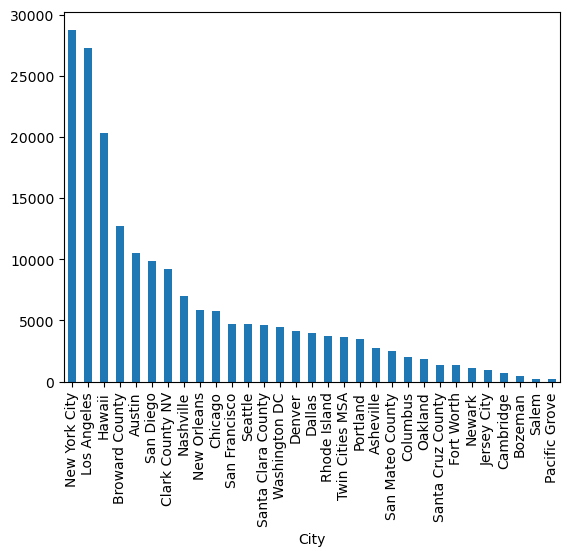

In [13]:
df['City'].value_counts().plot(kind='bar')

In [14]:
df

,id,listing_url,picture_url,name,description,property_type,room_type,accommodates,number_of_reviews,bedrooms,beds,price,review_scores_rating,City,latitude,longitude,bathrooms
0,108061,https://www.airbnb.com/rooms/108061,https://a0.muscache.com/pictures/miso/Hosting-...,Walk to stores/parks/downtown. Fenced yard/Pet...,Walk to town in ten minutes! Monthly rental in...,Entire rental unit,Entire home/apt,2,92,1.0,1.0,100.0,4.51,Asheville,35.606700,-82.555630,1.0
1,155305,https://www.airbnb.com/rooms/155305,https://a0.muscache.com/pictures/8880711/cf38d...,Cottage! BonPaul + Sharky's Hostel,<b>The space</b><br />Pet friendly private cot...,Entire guesthouse,Entire home/apt,2,383,1.0,1.0,100.0,4.59,Asheville,35.578640,-82.595780,1.0
2,156805,https://www.airbnb.com/rooms/156805,https://a0.muscache.com/pictures/23447d55-fa7e...,"Private Room ""Ader"" at BPS Hostel",<b>The space</b><br />Private Rooms at Bon Pau...,Private room in home,Private room,2,67,1.0,1.0,66.0,4.52,Asheville,35.578640,-82.595780,2.5
3,197263,https://www.airbnb.com/rooms/197263,https://a0.muscache.com/pictures/miso/Hosting-...,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",Private room in home,Private room,2,66,1.0,1.0,45.0,4.95,Asheville,35.578080,-82.636890,1.0
4,209068,https://www.airbnb.com/rooms/209068,https://a0.muscache.com/pictures/1829924/9f3bf...,Terrace Cottage,Located in one of Asheville's oldest historic ...,Entire guest suite,Entire home/apt,4,60,1.0,2.0,100.0,4.87,Asheville,35.618560,-82.552760,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268251,54016319,https://www.airbnb.com/rooms/54016319,https://a0.muscache.com/pictures/miso/Hosting-...,NEW! Gorgeous 3BDRM House in the Heart of the ...,"NEW LISTING! This stunning, fully renovated hi...",Entire home,Entire home/apt,6,30,3.0,4.0,349.0,4.97,Washington DC,38.930305,-77.040695,2.5
268252,54016628,https://www.airbnb.com/rooms/54016628,https://a0.muscache.com/pictures/667b9faa-f192...,Cozy 1BR BSMT suite near Anacostia Park- 8min ...,"Private, cozy & spacious modern 1-BR Basement ...",Private room in home,Private room,4,16,1.0,2.0,90.0,4.81,Washington DC,38.872790,-76.977230,1.0
268260,840142940538587740,https://www.airbnb.com/rooms/840142940538587740,https://a0.muscache.com/pictures/miso/Hosting-...,Perfect if exploring DC or MD!,This stylish place to stay is perfect for grou...,Private room in home,Private room,2,1,1.0,1.0,68.0,5.00,Washington DC,38.888376,-76.926589,1.0
268265,840874289101839772,https://www.airbnb.com/rooms/840874289101839772,https://a0.muscache.com/pictures/miso/Hosting-...,Private Unit Near Metro Station,This stylish place to stay is perfect for coup...,Entire rental unit,Entire home/apt,2,1,1.0,1.0,80.0,5.00,Washington DC,38.891267,-76.936067,1.0


In [15]:
df['City'].value_counts()

City
New York City         28781
Los Angeles           27266
Hawaii                20329
Broward County        12709
Austin                10553
San Diego              9870
Clark County NV        9206
Nashville              6999
New Orleans            5866
Chicago                5770
San Francisco          4747
Seattle                4695
Santa Clara County     4591
Washington DC          4474
Denver                 4132
Dallas                 3957
Rhode Island           3769
Twin Cities MSA        3680
Portland               3481
Asheville              2740
San Mateo County       2468
Columbus               1987
Oakland                1858
Santa Cruz County      1342
Fort Worth             1340
Newark                 1093
Jersey City             934
Cambridge               711
Bozeman                 426
Salem                   231
Pacific Grove           178
Name: count, dtype: int64

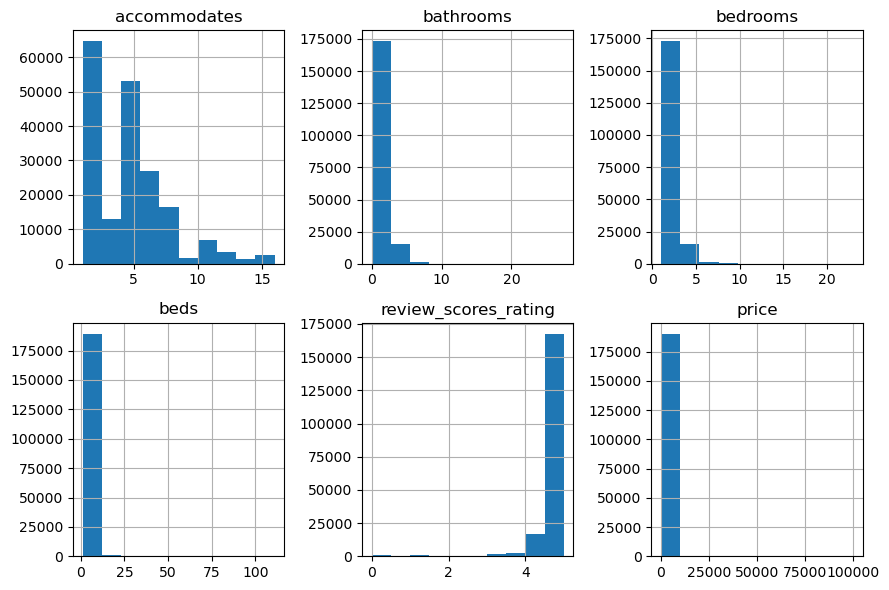

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(9, 6))

nums = df[['accommodates','bathrooms','bedrooms','beds','review_scores_rating','price']]

for ax, column in zip(axs.flatten(), nums):
    df[column].hist(ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [17]:
df.isna().sum()

id                        0
listing_url               0
picture_url               0
name                      0
description               0
property_type             0
room_type                 0
accommodates              0
number_of_reviews         0
bedrooms                  0
beds                      0
price                     0
review_scores_rating      0
City                      0
latitude                  0
longitude                 0
bathrooms               238
dtype: int64

In [18]:
df['bathrooms'].replace(np.nan, 0.5, inplace=True)

C:\Users\lukas_dtet3v6\AppData\Local\Temp\ipykernel_8868\3994824152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan, 0.5, inplace=True)


In [19]:
df.isna().sum()

id                      0
listing_url             0
picture_url             0
name                    0
description             0
property_type           0
room_type               0
accommodates            0
number_of_reviews       0
bedrooms                0
beds                    0
price                   0
review_scores_rating    0
City                    0
latitude                0
longitude               0
bathrooms               0
dtype: int64

In [ ]:
28923

In [20]:
# Number of total samples
n_samples = 28923  # Adjust this value as needed

# Calculate the number of rows for each city
city_counts = df['City'].value_counts()

# Calculate the proportion of each city
city_proportions = city_counts / len(df)

# Calculate the number of samples for each city
samples_per_city = (city_proportions * n_samples).round().astype(int)

# Create a new DataFrame to hold the sampled data
df_sampled = pd.DataFrame()

# Sample the data
for city in df['City'].unique():
    df_city = df[df['City'] == city]
    n_city_samples = samples_per_city[city]
    df_sampled = pd.concat([df_sampled, df_city.sample(n_city_samples if len(df_city) > n_city_samples else len(df_city))])

# Reset the index
df_sampled.reset_index(drop=True, inplace=True)


<Axes: xlabel='City'>

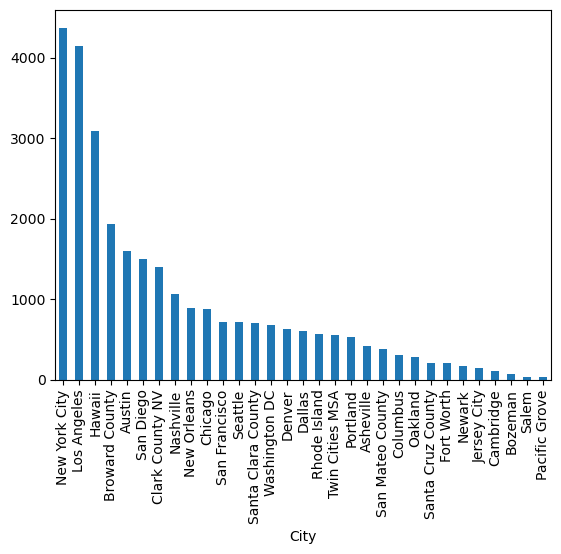

In [21]:
df_sampled['City'].value_counts().plot(kind='bar')

In [22]:
df_sampled['City'].value_counts()

City
New York City         4377
Los Angeles           4147
Hawaii                3092
Broward County        1933
Austin                1605
San Diego             1501
Clark County NV       1400
Nashville             1064
New Orleans            892
Chicago                878
San Francisco          722
Seattle                714
Santa Clara County     698
Washington DC          680
Denver                 628
Dallas                 602
Rhode Island           573
Twin Cities MSA        560
Portland               529
Asheville              417
San Mateo County       375
Columbus               302
Oakland                283
Santa Cruz County      204
Fort Worth             204
Newark                 166
Jersey City            142
Cambridge              108
Bozeman                 65
Salem                   35
Pacific Grove           27
Name: count, dtype: int64


Range Review:  0.0  -  5.0


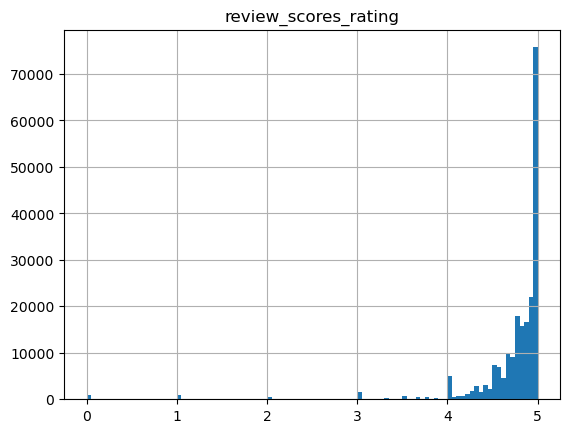

In [23]:
# Membuat grafik perbandingan umur dengan count
combined_df[['review_scores_rating']].hist(bins=100)
print('\nRange Review: ', combined_df['review_scores_rating'].min(), ' - ', combined_df['review_scores_rating'].max())

In [24]:
df_sampled.to_csv('listings_cleaned_new.csv', index=False)